In [1]:
%cd /home/isaiah/code/NestedGraphs/

/home/isaiah/code/NestedGraphs


In [2]:
import glob
import torch 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

from utils.graph_utils import propagate_labels
torch.set_num_threads(8)

In [3]:
def get_data(name=''):
    print('inputs/Sept23/benign/tgat_emb'+name+'graph*')
    b_embs = glob.glob('inputs/Sept23/benign/tgat_emb'+name+'graph*')
    m_embs = glob.glob('inputs/Sept23/mal/tgat_emb'+name+'graph*')

    print(len(b_embs))
    print(len(m_embs))

    bs = []
    for b in b_embs:
        bs.append(torch.load(b))

    ms = []
    for m in m_embs:
        ms.append(torch.load(m))

    b_x = torch.cat([b for b in bs])
    m_x = torch.cat([m for m in ms])

    print(b_x.size())
    print(m_x.size())

    colors = []
    for m in m_embs:
        with open(m.replace('tgat_emb'+name,'full_'), 'rb') as f:
            g = pickle.load(f)

        procs = (g.x[:,0] == 1).nonzero().squeeze(-1)
        y = propagate_labels(g,23)
        colors.append(y[procs])

    colors = torch.cat(colors).clamp(0,1)

    return b_x.cpu(), m_x.cpu(), colors

In [4]:
def plots_dots(b_x, m_x, title, colors):
    pca = PCA(n_components=3)
    bx = pca.fit_transform(b_x)
    x = pca.transform(m_x)

    plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

    plt.scatter(bx[:,0], bx[:,2], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,2], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,2], color='red')
    plt.title(title)
    plt.show()

inputs/Sept23/benign/tgat_emb_clgraph*
25
17
torch.Size([77602, 128])
torch.Size([49230, 128])


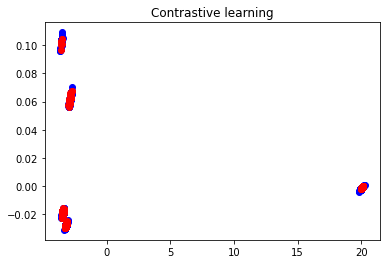

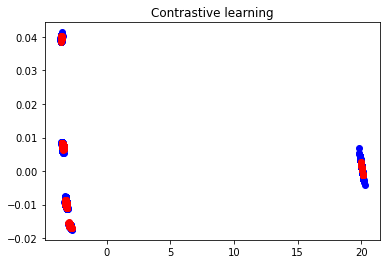

: 

In [12]:
b_x, m_x, colors = get_data('_cl')
plots_dots(b_x, m_x, 'Contrastive learning', colors)

inputs/Sept23/benign/tgat_emb_clmsgraph*
25
17
torch.Size([77602, 128])
torch.Size([49230, 128])


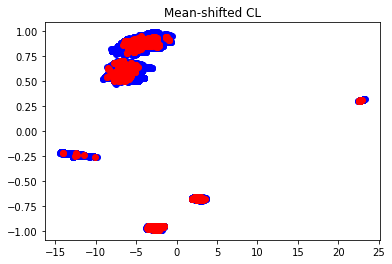

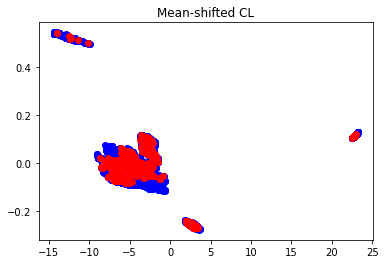

In [5]:
b_x, m_x, colors = get_data('_clms')
plots_dots(b_x, m_x, 'Mean-shifted CL', colors)